In [17]:
library(tidyverse)
library(FactoMineR)
library(factoextra)
library(readxl)


In [6]:
library(VIM)

Loading required package: colorspace

Loading required package: grid

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, were retired in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.

VIM is ready to use.


Suggestions and bug-reports can be submitted at: https://github.com/statistikat/VIM/issues


Attaching package: ‘VIM’


The following object is masked from ‘package:datasets’:

    sleep




In [22]:
data <- read_excel("./car_example.xls")
data

car_full_nm,horsepower_bhp,rpm_horsepower_measure_point,torque_lb_ft,rpm_torque_measure_point,car_0_60_time_seconds,engine_size_cc,engine_size_ci,top_speed_mph,top_speed_kph,horsepower_per_ton_bhp,year,decade,make_nm,car_weight_tons,torque_per_ton
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Bugatti Veyron 8.0 litre W16 Super Sport - [2010],1184,6400,NA,NA,2.5,7993,487.7,258,415,644.1,2010,2010s,Bugatti,1.8382239,NA
Bugatti Veyron 16.4 Grand Sport Vitesse - [2012],1184,6400,1106,3000,2.5,7993,487.7,255,410,594.9,2012,2010s,Bugatti,1.9902505,555.7090
SSC Ultimate Aero TT - [2008],1183,6950,1094,6150,2.8,6348,387.3,273,439,946.4,2008,2000s,SSC,1.2500000,875.2000
Koenigsegg Agera R 5.0 V8 - [2012],1124,7100,885,4100,2.9,5032,307.0,273,439,794.3,2012,2010s,Koenigsegg,1.4150825,625.4052
Porsche 9FF GT9R - [2009],1120,7850,774,5970,2.9,4000,244.0,256,411,832.0,2009,2000s,Porsche,1.3461538,574.9714
Koenigsegg Agera 5L V8 - [2011],1100,2700,885,4100,2.9,5032,307.0,261,420,766.5,2011,2010s,Koenigsegg,1.4350946,616.6841
Hennessey Venom GT - [2010],1030,6500,972,4200,2.5,6162,376.0,260,418,844.2,2010,2010s,Hennessey,1.2200900,796.6625
Koenigsegg Agera S 5.0 V8 Hundra - [2013],1016,7100,811,4100,2.8,5032,307.0,249,400,718.0,2013,2010s,Koenigsegg,1.4150418,573.1280
Koenigsegg CCX R Special Edition 4.8 V8 S - [2008],1004,7000,796,5600,2.9,4800,292.9,254,408,784.3,2008,2000s,Koenigsegg,1.2801224,621.8155


Creamos hipotesis respecto el tema

- Esto va de maquinas de motores de coches

Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


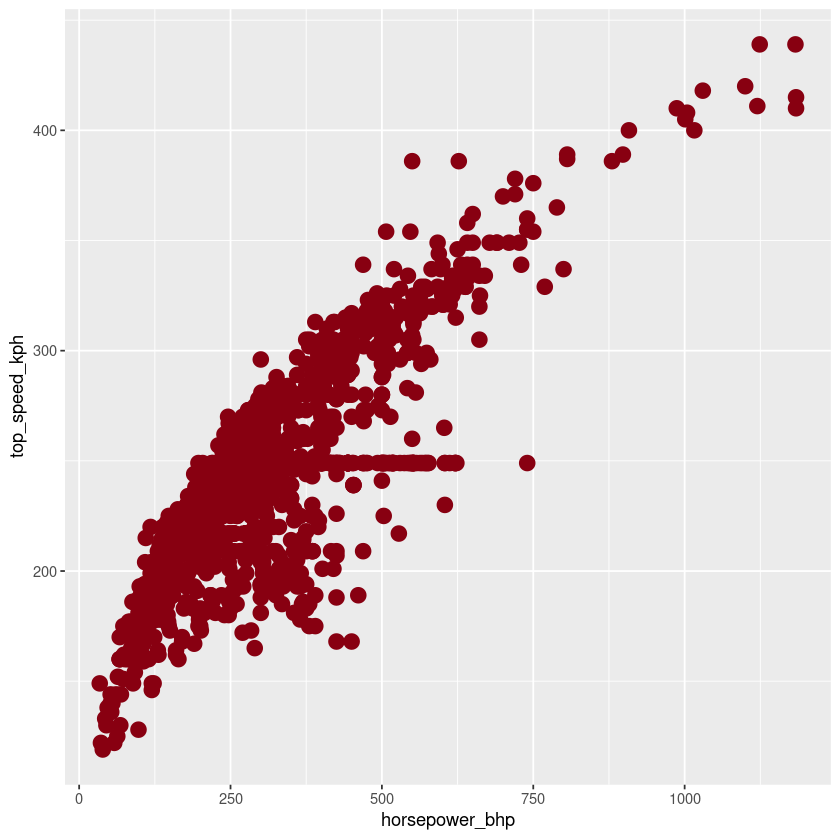

In [25]:
data %>% ggplot(aes(x=horsepower_bhp,y=top_speed_kph)) + geom_point(alpha=4,size=4,color="#880011")

Warning message:
“Removed 10 rows containing non-finite values (`stat_bin()`).”


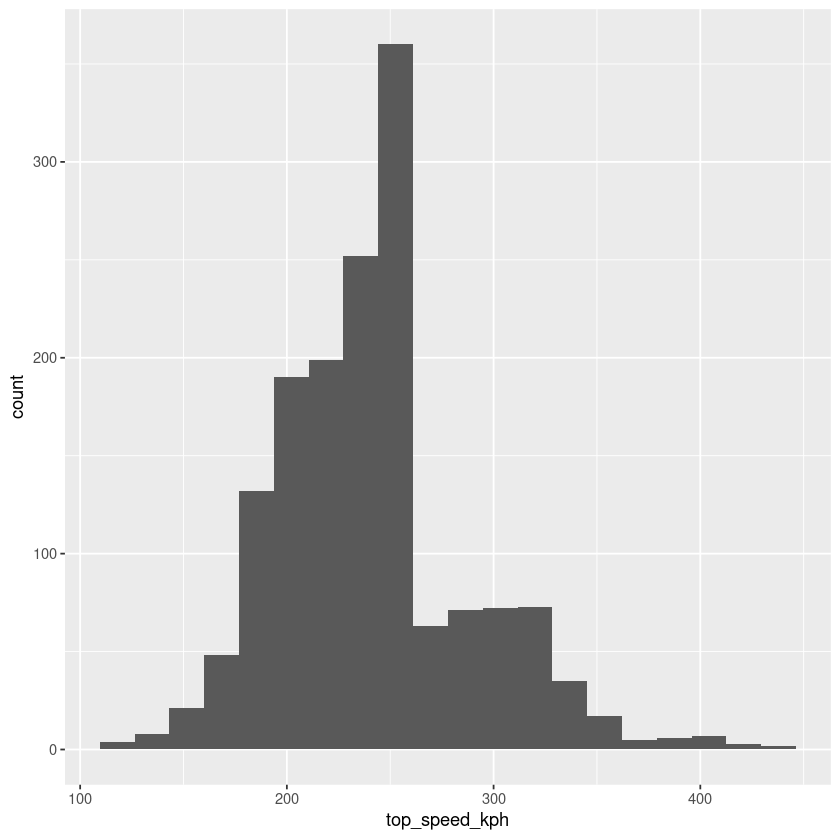

In [30]:
ggplot(data=data,mapping=aes(x=top_speed_kph)) + geom_histogram(bins=20)

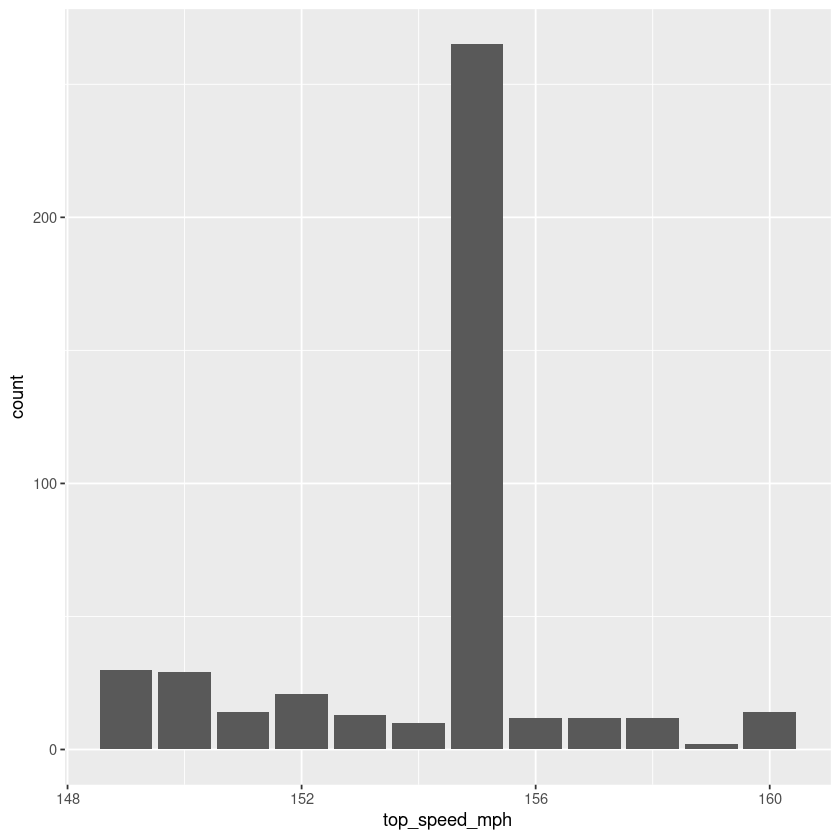

In [35]:
data %>% filter(top_speed_mph %in% 149:160) %>% ggplot(aes(x=top_speed_mph)) + geom_bar()

Warning message:
“Removed 10 rows containing non-finite values (`stat_bin()`).”


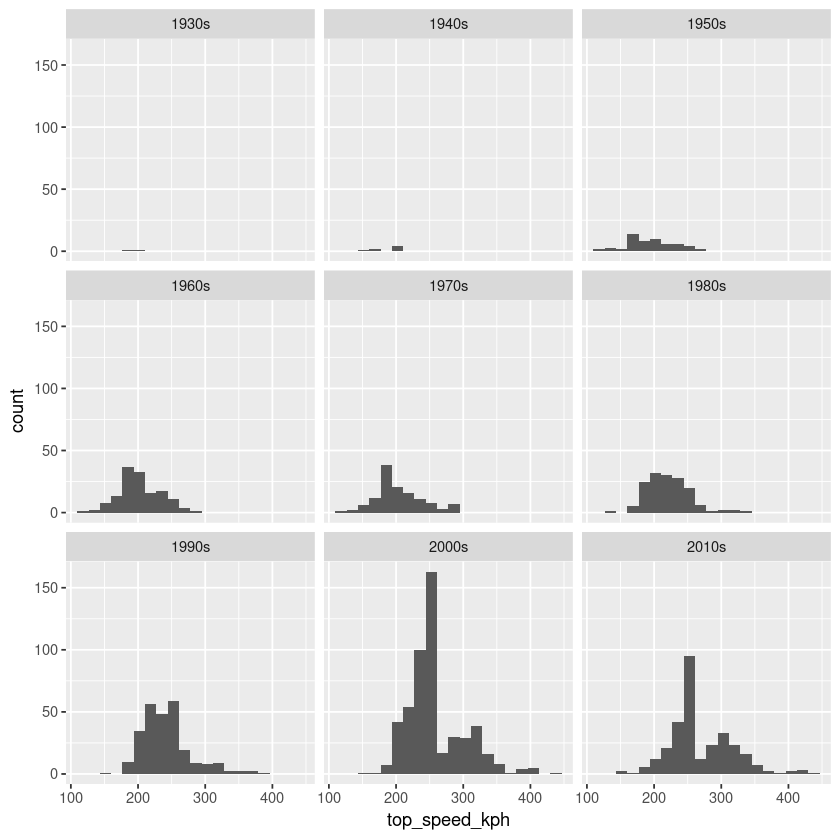

In [38]:
ggplot(data=data,mapping=aes(x=top_speed_kph)) + geom_histogram(bins=20) + facet_wrap(~decade)

In [51]:
data %>% filter(year >= 1990) %>% filter(top_speed_mph==155) %>% group_by(make_nm) %>% summarise(count_controlled = n()) %>% arrange(desc(count_controlled))

make_nm,count_controlled
<chr>,<int>
BMW,53
Audi,51
Mercedes,41
Jaguar,14
Nissan,9
Subaru,7
Volkswagen(VW),7
Volvo,7
Ford,5


Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


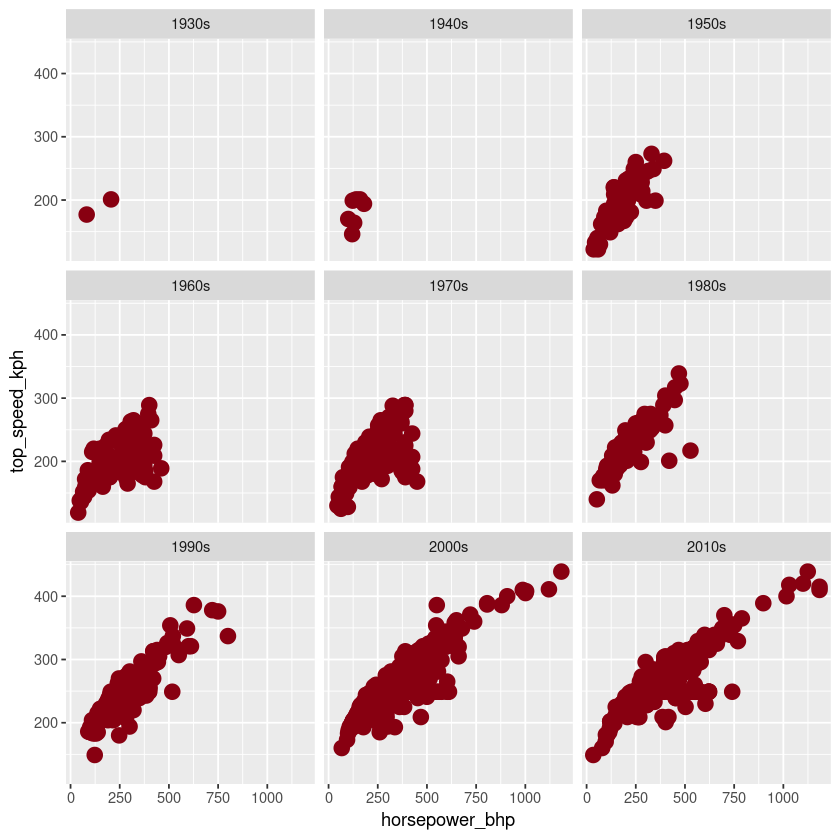

In [52]:
data %>% ggplot(aes(x=horsepower_bhp,y=top_speed_kph)) + geom_point(alpha=4,size=4,color="#880011") + facet_wrap(~decade)

In [56]:
data %>% filter(horsepower_bhp>750) %>% filter(year>=2010) %>% group_by(make_nm) %>% summarise(count_controlled = n()) %>% arrange(desc(count_controlled))

make_nm,count_controlled
<chr>,<int>
Koenigsegg,4
Bugatti,2
Ferrari,1
Gumpert,1
Hennessey,1


Warning message:
“Removed 10 rows containing missing values (`geom_point()`).”


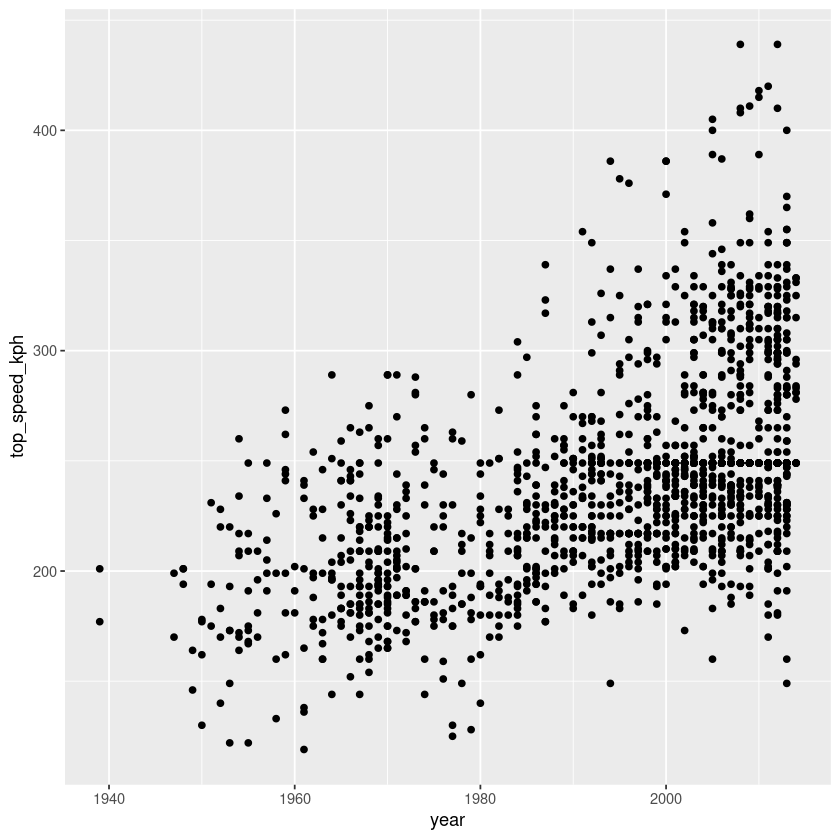

In [57]:
data %>% ggplot(aes(x=year,y=top_speed_kph)) + geom_point(alpha=4)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


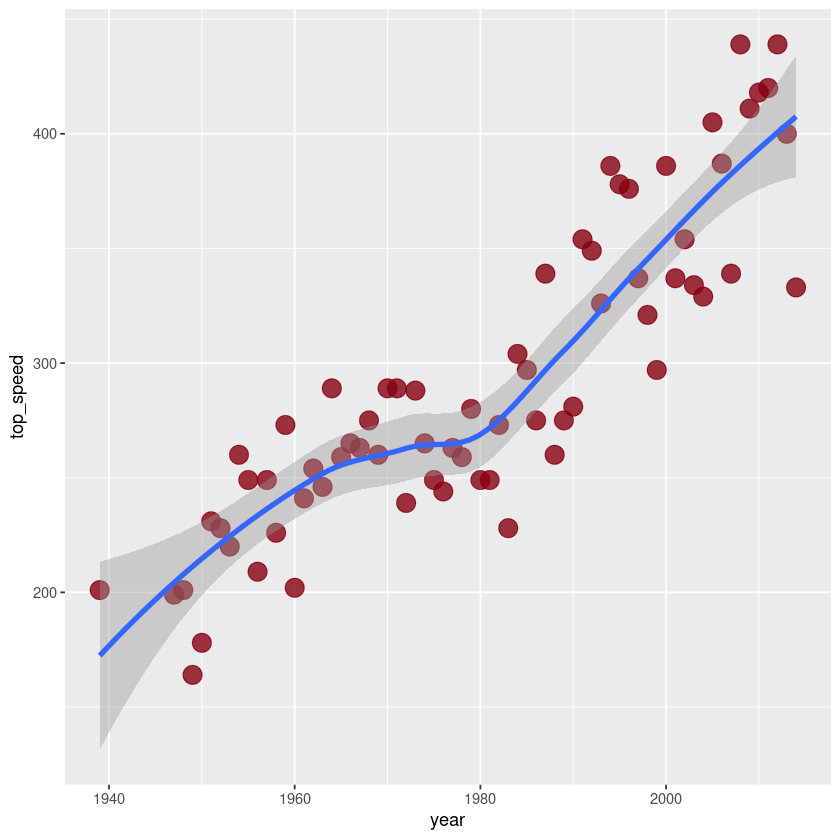

In [61]:
 data %>% group_by(year) %>% summarise(top_speed = max(top_speed_kph,na.rm=TRUE)) %>% ggplot(aes(x=year,y=top_speed)) + geom_point(alpha=0.8,size=5,color="#880011") + stat_smooth(method="auto",size=1.5)